In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 17s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

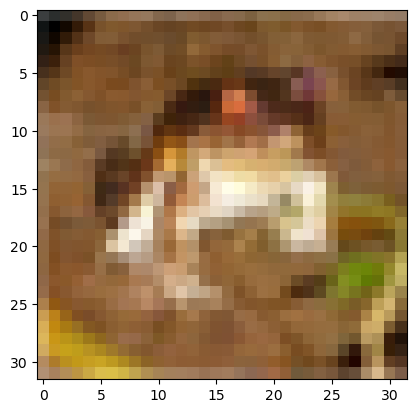

In [7]:
plt.imshow(X_train[0])

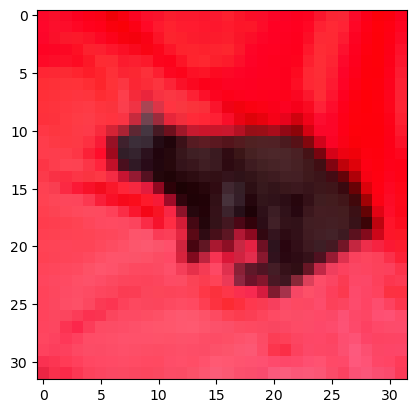

In [11]:
plt.imshow(X_train[21])

In [12]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [14]:
X_train[0].shape

(32, 32, 3)

In [15]:
X_train = X_train/225

In [16]:
X_test = X_test/225

In [18]:
X_train.shape

(50000, 32, 32, 3)

In [19]:
X_test.shape

(10000, 32, 32, 3)

In [22]:
y_test.shape

(10000, 1)

In [24]:
print(y_test[0])

[3]


In [28]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
y_cat_train = to_categorical(y_train,10)

In [31]:
y_cat_test = to_categorical(y_test,10)

In [33]:
y_cat_test.shape

(10000, 10)

In [34]:
y_cat_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [35]:
from tensorflow.keras.models import Sequential

In [36]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [40]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size=(4,4),input_shape= (32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size=(4,4),input_shape= (32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 256)              

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
early_stop = EarlyStopping(monitor = 'val_loss',patience=2, mode = 'min')

In [46]:
model.fit(X_train,y_cat_train,
         epochs=15,
         validation_data=(X_test,y_cat_test),callbacks=(early_stop))
          

Epoch 1/15
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4866 - accuracy: 0.4633 - val_loss: 1.2791 - val_accuracy: 0.5390
Epoch 2/15
1563/1563 [==============================] - 23s 14ms/step - loss: 1.1626 - accuracy: 0.5919 - val_loss: 1.0912 - val_accuracy: 0.6145
Epoch 3/15
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0171 - accuracy: 0.6454 - val_loss: 1.0495 - val_accuracy: 0.6309
Epoch 4/15
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9178 - accuracy: 0.6805 - val_loss: 1.0347 - val_accuracy: 0.6448
Epoch 5/15
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8320 - accuracy: 0.7109 - val_loss: 0.9696 - val_accuracy: 0.6695
Epoch 6/15
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7529 - accuracy: 0.7361 - val_loss: 0.9906 - val_accuracy: 0.6649
Epoch 7/15
1563/1563 [==============================] - 24s 15ms/step - loss: 0.6764 - accuracy: 0.7626 - val_loss: 0.9814 -

In [48]:
losses = pd.DataFrame(model.history.history)


In [49]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.486584,0.46334,1.279079,0.5390
1,1.162557,0.59190,1.091189,0.6145
2,1.017136,0.64542,1.049528,0.6309
3,0.917781,0.68052,1.034732,0.6448
4,0.832026,0.71094,0.969553,0.6695


<Axes: >

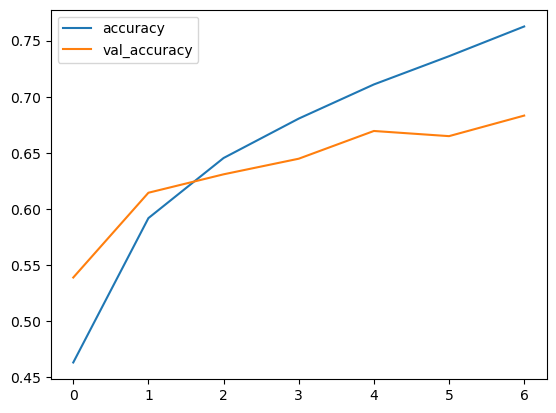

In [50]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

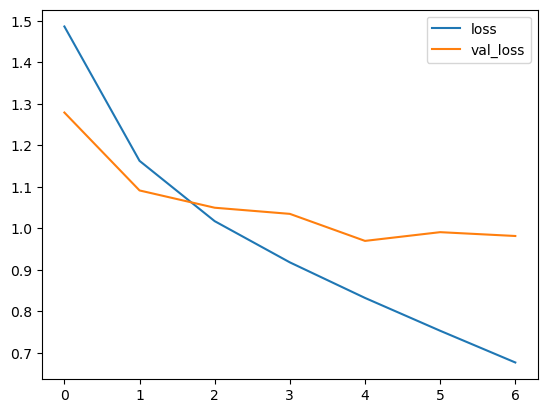

In [51]:
losses[['loss','val_loss']].plot()

In [52]:
model.metrics_names

['loss', 'accuracy']

In [54]:
print(model.metrics_names)
print(model.evaluate(X_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.9813605546951294, 0.6832000017166138]


In [56]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [57]:
predictions.shape

(10000, 10)

In [59]:
np.round(predictions[1])

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [63]:
pred = np.argmax(predictions,axis=1)

In [66]:
pred[1]

8

In [68]:
confusion_matrix(y_test,pred)

array([[762,  31,  35,  25,  17,   8,  10,  13,  55,  44],
       [ 28, 796,  12,  21,   1,   3,  18,   4,  24,  93],
       [ 81,   5, 572, 103,  73,  56,  63,  24,  10,  13],
       [ 19,   9,  62, 639,  52, 114,  48,  31,   9,  17],
       [ 25,   9,  84, 116, 589,  43,  44,  72,  14,   4],
       [ 12,   5,  67, 313,  41, 493,  20,  34,   8,   7],
       [ 10,   6,  46,  99,  36,  13, 765,  13,   5,   7],
       [ 19,   4,  26,  82,  60,  53,   8, 724,   3,  21],
       [104,  48,  18,  24,   6,  12,  12,   3, 728,  45],
       [ 39,  85,   9,  29,   5,   3,  18,  24,  24, 764]], dtype=int64)

<Axes: >

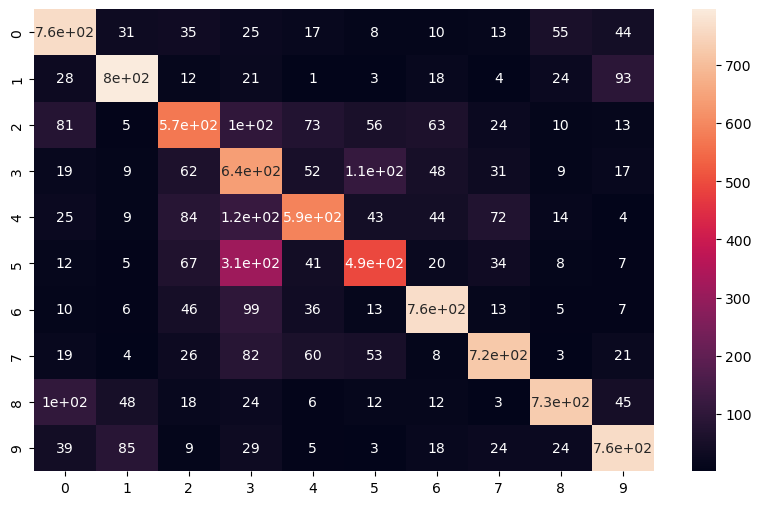

In [69]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [77]:
my_image = X_test[16]

In [79]:
my_image.shape

(32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


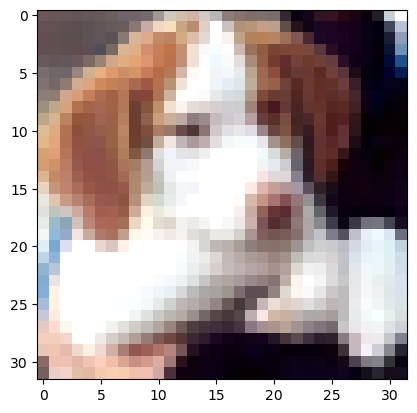

In [76]:
plt.imshow(my_image)

In [84]:
model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 18ms/step


array([[9.2534101e-05, 5.5068365e-04, 3.4233998e-04, 1.5106197e-01,
        1.0185758e-05, 8.4620303e-01, 6.1989608e-06, 1.4495394e-03,
        2.7459025e-04, 9.0177919e-06]], dtype=float32)

In [90]:
pred = np.argmax(model.predict(my_image.reshape(1,32,32,3)),axis=1)

1/1 [==============================] - 0s 19ms/step


In [86]:
pred

array([5], dtype=int64)

In [88]:
if pred == 5:
    print('It was a Dog and its predicted correctly')

It was a Dog and its predicted correctly
